<a href="https://colab.research.google.com/github/nithinbadicodes/AI-ML-Projects/blob/master/WineQualityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine Quality Prediction Model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
wine = pd.read_csv('winequality.csv')
wine.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
820,7.0,0.685,0.00,1.9,0.099,9.0,22.0,0.99606,3.34,0.60,9.7,5
1537,5.4,0.580,0.08,1.9,0.059,20.0,31.0,0.99484,3.50,0.64,10.2,6
931,7.4,0.610,0.01,2.0,0.074,13.0,38.0,0.99748,3.48,0.65,9.8,5
734,7.7,0.560,0.20,2.0,0.075,9.0,39.0,0.99870,3.48,0.62,9.3,5
45,4.6,0.520,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4


## Exploratory Data Analysis

In [ ]:
wine.shape

(1599, 12)

In [ ]:
wine.isnull().sum().sum()

np.int64(0)

In [ ]:
wine.quality.value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


In [ ]:
# Making binary classification
bins = (2,6.5,8)
wine['quality'] = pd.cut(wine['quality'],bins=bins,labels=['bad','good'])

In [ ]:
wine['quality'].value_counts()

,count
quality,
bad,1382
good,217


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
wine['quality'] = le.fit_transform(wine['quality'])
wine['quality'].value_counts()

,count
quality,
0,1382
1,217


* `0 -> bad`
* `1 -> good`

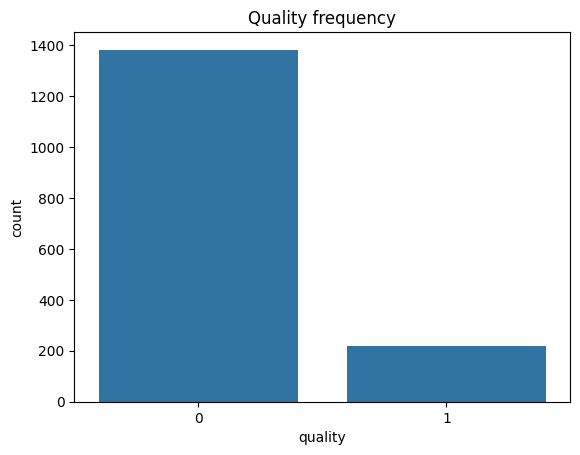

In [ ]:
import seaborn as sns
sns.countplot(data=wine,x='quality')
plt.title('Quality frequency')
plt.show()

In [ ]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## Just for reference, what all the columns contribute in testing the quality of wine. Listed below

* **Acidity Measures**

 * Fixed acidity: Non-volatile acids (mainly tartaric acid) that don't evaporate easily. Affects wine's crispness and preservation.
 * Volatile acidity: Acids that can evaporate (mainly acetic acid). High levels create vinegar-like taste - undesirable.
 * Citric acid: Adds freshness and citrus notes. Found in small quantities, can prevent bacterial growth.

* **Sweetness & Minerals**

 * Residual sugar: Sugar remaining after fermentation stops. Determines if wine is dry, off-dry, or sweet.
 * Chlorides: Salt content. Affects taste perception and wine stability.
 * Sulphates: Sulfur compounds (potassium sulfate). Acts as preservative and antioxidant.

* **Sulfur Dioxide (SO₂) - Preservatives**

 * Free sulfur dioxide: Active form that prevents microbial growth and oxidation.
 * Total sulfur dioxide: Free + bound SO₂. Too much causes sulfur smell/taste.

* **Physical Properties**

 * Density: Mass per volume. Indicates alcohol/sugar content (alcohol is less dense than water).
 * pH: Acidity level (lower = more acidic). Affects taste, color, and microbial stability.
 * Alcohol: Ethanol percentage. Key factor in wine body and flavor intensity.

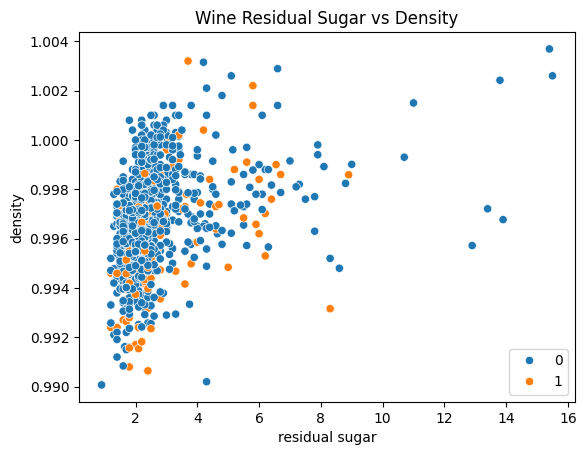

In [34]:
# Scatterplot between Wine Residual sugar and Wine density
sns.scatterplot(data=wine, x = 'residual sugar',y = 'density',hue='quality')
plt.title('Wine Residual Sugar vs Density')
plt.legend(loc = 'lower right');

* This makes perfect chemical sense: sugar is denser than water, so more sugar = higher density

<Axes: xlabel='alcohol', ylabel='density'>

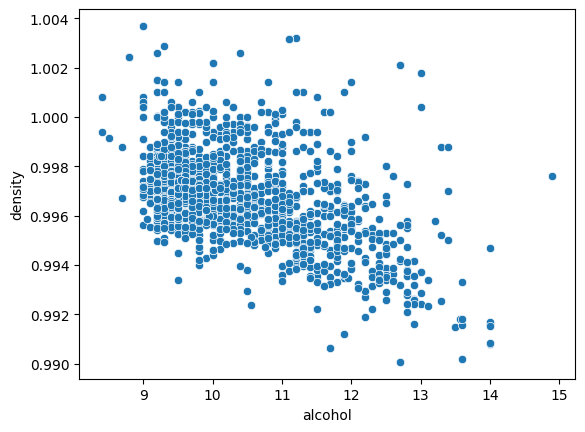

In [35]:
sns.scatterplot(data=wine, x='alcohol',y='density')

* There is a strong negative correlation between alcohol and density.

## Let's see some other correlations using a heatmap

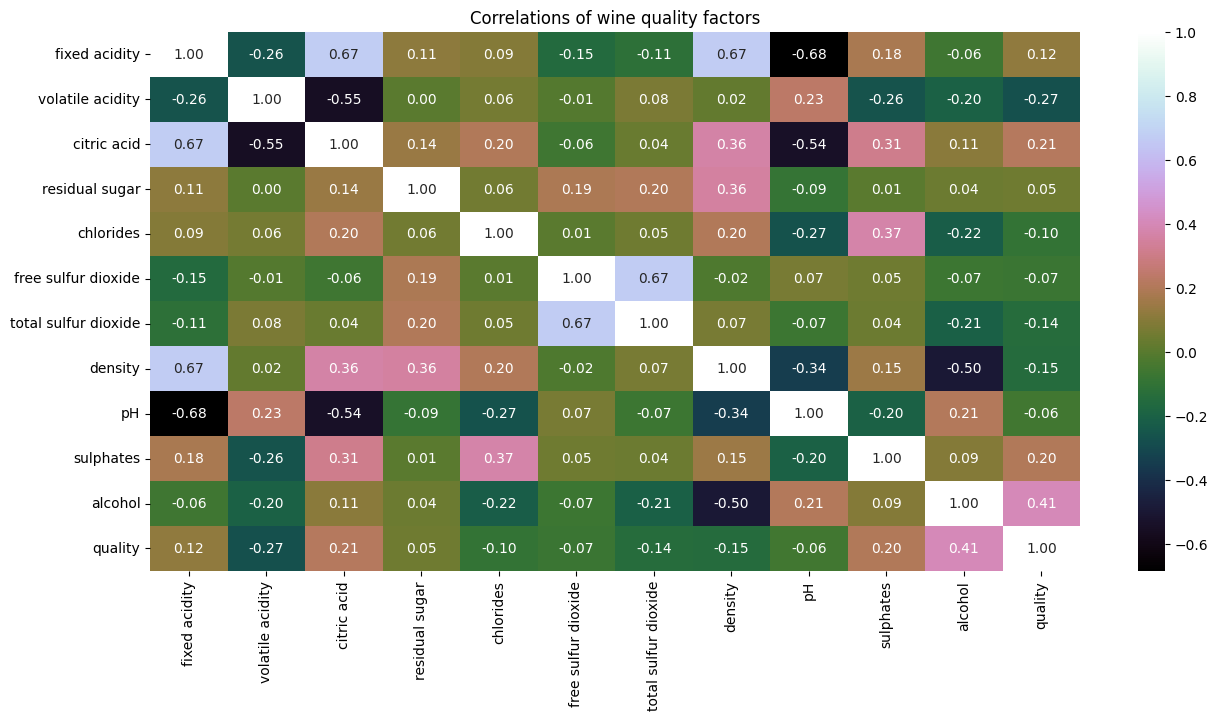

In [39]:
plt.figure(figsize=(15,7))
sns.heatmap(wine.corr(),annot=True,fmt=".2f",cmap="cubehelix")
plt.title("Correlations of wine quality factors");

* **Positive Quality Correlations**

 * Alcohol (0.41): Strongest predictor! Higher alcohol = better quality
 * Citric acid (0.21): Adds freshness and complexity
 * Sulphates (0.20): Acts as preservative, indicates proper winemaking

* **Negative Quality Correlations**

 * Volatile acidity (-0.27): Confirms our earlier discussion - vinegar taste ruins quality
 * Density (-0.15): Lower density wines (more alcohol, less sugar) tend to be better